In [18]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

from PIL import Image
from random import randint
from matplotlib.axes._axes import _log as matplotlib_axes_logger

### DATA
I read the test data as panda data frame and convert it to numpy.

In [19]:
test = pd.read_csv("iris_new_data.csv", header=None, skip_blank_lines=False, delim_whitespace=True)

In [20]:
iris_np = pd.DataFrame.to_numpy(test)
#print(iris_array[0:10])

### Normalization
Normalizing the data gratly imporove the performance.

In [28]:
# Normalization
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(iris_np)  
iris_np = transformer.transform(iris_np)

# Bisecting KMeans
This one is impelimented using KMeans class that I have implemented.
The process is in 2 steps: 

### step 1

clculate K mwan clustering for 2 cluster.


In [55]:
from KMean import *
import time

start_time = time.time()


BKmean_Irish = KMeans(iris_np, 2,4)
BKmean_Irish.Random_centroid()
B2Error, B2label, Bcentroid = BKmean_Irish.Main(10)
print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 10/10 [00:00<00:00, 1788.84it/s]

--- 0.01410984992980957 seconds ---


Calculating the class with the higher error :

In [56]:
High_error = np.argmax(B2Error)
B2label[B2label == np.argmin(B2Error)] = 2
print(B2label)



[2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0]


In [57]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

#### Visualization 
This is visualization of 2 classes in 2D with the use of 2 features.

<Figure size 432x288 with 0 Axes>

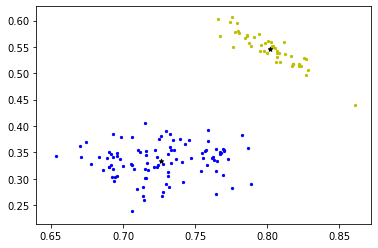

In [58]:
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure()

cmap = get_cmap(10)
fig, ax = plt.subplots()

ax.scatter(iris_np[B2label==High_error][:, 0], iris_np[B2label==High_error][:, 1], s=5, c='b')
ax.scatter(iris_np[B2label==2][:, 0], iris_np[B2label==2][:, 1], s=5, c='y')
ax.scatter(Bcentroid[1, 0], Bcentroid[1, 1], marker='*', s=20, c='#050505')
ax.scatter(Bcentroid[0, 0], Bcentroid[0, 1], marker='*', s=20, c='#050505')


### step 2
Dividing the cluster with higher error into 2 smaller clusters

In [59]:
start_time = time.time()


B3Kmean_Irish = KMeans(iris_np[B2label == i], 2, 4)
B3Kmean_Irish.Random_centroid()
B3Error, B3label, B3centroid = B3Kmean_Irish.Main(10)
print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 10/10 [00:00<00:00, 884.63it/s]

--- 0.020317792892456055 seconds ---


In [48]:
B2label[B2label == i] = B3label
print (B2label)

[2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2 2 2 2 0
 0 0 1 2 2 0 0 0 0 0 0 1 1 2 2 2 2 2 0 0 0 0 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 1 2 2 2 2 2 2 0 0 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 0 1
 1 1]


### visulaisation in 3D

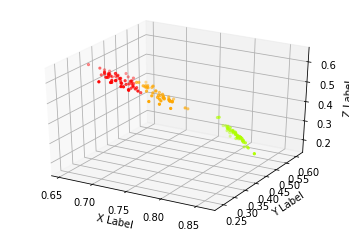

In [50]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits.mplot3d import Axes3D


matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = get_cmap(10)


for i in range(3):
    ax.scatter(iris_np[B2label==i][:, 0], iris_np[B2label==i][:, 1], iris_np[B2label==i][:, 2], s=5, c=cmap(i))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [51]:
np.savetxt("iris_submission_B" + ".txt", B2label, fmt='%s')